### Loading necessary library

In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch 
import torch.nn as nn
import torch.nn.functional as F

### Loading dataset

In [84]:
dataset = pd.read_csv("/home/hasan/Desktop/irish_PyTorch/iris.csv")

### Encoding

In [85]:
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset["species"])

# dataset.species = dfx.sentiment.apply(lambda x: 1 if x == "Iris-setosa" 2 if x == "Iris-versicolor"  else 3)

### Shuffling dataset

In [86]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           6.0          2.7           5.1          1.6        1
1           6.3          3.3           6.0          2.5        2
2           7.7          3.8           6.7          2.2        2
3           6.7          3.1           4.7          1.5        1
4           6.4          2.8           5.6          2.2        2


### Dividing dataset

In [87]:
X = dataset.drop(['species'], axis=1).values
y = dataset['species'].values

In [88]:
X.shape, y.shape

((150, 4), (150,))

In [89]:
X_train, xtest, Y_train, ytest  = train_test_split(X, y, random_state=42, test_size=0.2)
Xtrain, xvalid, Ytrain, yvalid = train_test_split(X_train, Y_train, random_state=42, test_size=.1)

In [90]:
Xtrain.shape, xtest.shape, xvalid.shape, Ytrain.shape, ytest.shape, yvalid.shape

((108, 4), (30, 4), (12, 4), (108,), (30,), (12,))

### Converting to Tensor

In [91]:
Xtrain = torch.FloatTensor(Xtrain)
xtest = torch.FloatTensor(xtest)
xvalid = torch.FloatTensor(xvalid)
Ytrain = torch.LongTensor(Ytrain)
ytest = torch.LongTensor(ytest)
yvalid = torch.LongTensor(yvalid)

### Model

In [92]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

### Calling Model

In [93]:
Model = Model()

### Defining optimizer and criterion

In [94]:
#optimizer = torch.optim.SGD(Model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)
#loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

### Training Model

In [95]:
epochs = 1000
train_losses = []
valid_losses = []
train_correct = []
valid_correct = []

for epoch in range(epochs):
    out1 = Model.forward(Xtrain)
    train_loss = criterion(out1, Ytrain)
    train_losses.append(train_loss)
    
    out2 = Model.forward(xvalid)
    valid_loss = criterion(out2, yvalid)
    valid_losses.append(valid_loss)
    
    #print("Epoch {epoch:2}, Loss = {loss.item():10.8f}")

    optimizer.zero_grad()
    train_loss.backward()
    valid_loss.backward()
    optimizer.step()
    
    #train_correct += (out1 == Ytrain).float().sum()
    #valid_correct += (out2 == yvalid).float().sum()
    
    print(f'Epoch: {epoch:2}  Train_loss: {train_loss.item():10.8f}  Valid_loss:{valid_loss.item():10.8f} ')

Epoch:  0  Train_loss: 1.11030793  Valid_loss:1.10106575 
Epoch:  1  Train_loss: 1.03795004  Valid_loss:1.03558552 
Epoch:  2  Train_loss: 0.97704440  Valid_loss:0.98087806 
Epoch:  3  Train_loss: 0.91900563  Valid_loss:0.92865926 
Epoch:  4  Train_loss: 0.86179805  Valid_loss:0.87051225 
Epoch:  5  Train_loss: 0.80056810  Valid_loss:0.80145532 
Epoch:  6  Train_loss: 0.73985451  Valid_loss:0.73037416 
Epoch:  7  Train_loss: 0.67891717  Valid_loss:0.66298062 
Epoch:  8  Train_loss: 0.61502534  Valid_loss:0.59677905 
Epoch:  9  Train_loss: 0.55678231  Valid_loss:0.53465861 
Epoch: 10  Train_loss: 0.50964230  Valid_loss:0.48253047 
Epoch: 11  Train_loss: 0.47167602  Valid_loss:0.44252422 
Epoch: 12  Train_loss: 0.43643668  Valid_loss:0.40809909 
Epoch: 13  Train_loss: 0.40357500  Valid_loss:0.38095474 
Epoch: 14  Train_loss: 0.38016322  Valid_loss:0.35948181 
Epoch: 15  Train_loss: 0.35978037  Valid_loss:0.33892402 
Epoch: 16  Train_loss: 0.34145662  Valid_loss:0.32059580 
Epoch: 17  Tra

### Plot loss

Text(0.5, 0, 'epoch')

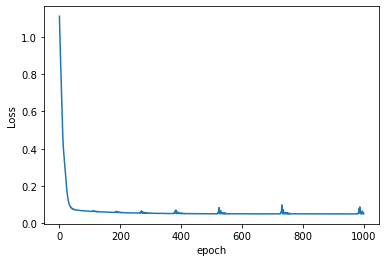

In [96]:
plt.plot(range(epochs), train_losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

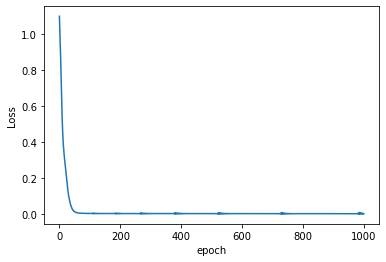

In [97]:
plt.plot(range(epochs), valid_losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

### Predicting

In [98]:
predict_out = Model(xtest)
_, predict_y = torch.max(predict_out, 1)

In [99]:
predict_y

tensor([0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 0,
        1, 2, 2, 1, 1, 1])

In [100]:
print('prediction accuracy :', accuracy_score(ytest.data, predict_y.data))

prediction accuracy : 1.0
